# Exercise: Principal Component Analysis

David R. Thompson, Jet Propulsion Laboratory, California Institute of Technology<br>
Contact: david.r.thompson@jpl.nasa.gov
__________

This exercise involves calculating sample-based covariance matrices of spectra, the eigenvalues and eigenvectors of these matrices, and the resulting principal component bases. First import the required software dependencies.

In [1]:
import scipy as s
from scipy.linalg import norm, eig
import pylab as plt

import figure_style

Now, load the `wavelengths.txt` ASCII text file and `ang20171108t184227_corr_v2p13_subset_bil` BIL datacube.

In [2]:
# Load Wavelengths
wavelengths = s.loadtxt('data/wavelengths.txt')

# Load the data and convert to Band-In-Pixel interleave
filename = '../ftp/ang20171108t184227_corr_v2p13_subset_bil'
rows, bands, cols = 500,425,680
mm = s.memmap(filename, dtype=s.float32, mode='r',shape=(rows,bands,cols))

Band-In-Pixel (BIP) indexing order lets us easily reference the datacube as a large continuous list of spectra in memory, and reshape into a 2-D matrix. We can then write subsequent calculations as concise matrix operations.

In [3]:
X = s.asarray(mm,dtype = s.float32).copy().transpose((0,2,1))
Xl = X.reshape((rows*cols, bands))

As before, we zero out deep water features and regions with suspect calibration.

In [4]:
# zero the deep water features and bad calibration in the extreme SWIR
deeph2o = s.logical_or(s.logical_and(wavelengths>1280, wavelengths<1450),
                       s.logical_and(wavelengths>1750, wavelengths<2000))

badcalibration = wavelengths > 2480
bad = s.logical_or(deeph2o, badcalibration)
Xl[:,bad] = 0

Watch out for values of -9999 in the data, which indicate the periphery of the rectangular geographically-registered image where the pushbroom sensor did not actually acquire data. We ignore these locations.

In [5]:
use = s.all(Xl >- 9900, axis=1)
Xsub = Xl[use,:]

We don't require *all* of the spectra to form our sample covariance matrix. Here, for speed I'll use every 40th spectrum in the list. I calculate the sample mean and covariance using scipy's built-in functions, and then plot the resulting covariance structure.  

<b> Question 1: </b> What do the block-diagonal structures that you see in the covariance represent, both mathematically and physically?

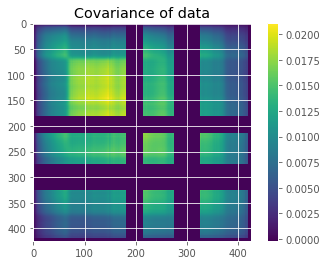

In [6]:
# Calculate the sample mean and covariance for every 40th spectrum
Xsub = Xsub[s.arange(0,Xsub.shape[0],40),:]
mu = Xsub.mean(axis=0)
Cov = s.cov(Xsub-mu, rowvar=False);

# Plot
plt.imshow(Cov)
plt.colorbar()
plt.title('Covariance of data')
plt.savefig('images/covariance.png')

Next, we calculate the eigenvalues and eigenvectors of the covariance, plot the top 10 principal components, and save the results to figures.  

<b> Question 2: </b> Are any of the top PCs interpretable, and if so, what do they represent?

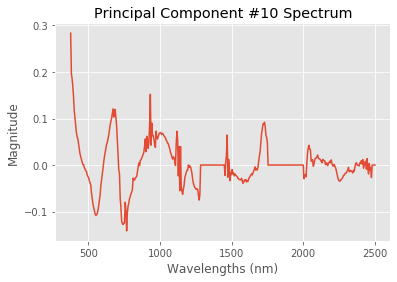

In [7]:
# Calculate eigenvalues and eigenvectors
ev, evec = eig(Cov)

# Plot
for i in range(10):
    plt.cla()
    plt.plot(wavelengths,evec[:,i])
    plt.xlabel('Wavelengths (nm)')
    plt.ylabel('Magnitude')
    plt.title('Principal Component #%i Spectrum'%(i+1))
    plt.savefig('images/evec%i_spectrum.png'%(i+1));

-------------
<b>Acknowledgements</b>: A portion of this research was performed at the Jet Propulsion Laboratory, California Institute of Technology. We acknowledge the support of a PRISM AITT grant from the National Aeronautics and Space Administration (NASA) Earth Science Technology Office. We acknowledge the support of the JPL and Caltech Presidents’ and Directors’ Fund Program. We thank other supporting sponsors including the NASA Earth Science Division for the HyspIRI preparatory campaign, the AVIRIS-NG instrument and the data analysis program “Utilization of Airborne Visible/Infrared Imaging Spectrometer Next Generation Data from an Airborne Campaign in India” NNH16ZDA001N-AVRSNG, for its support of the algorithm development; the Jet Propulsion Laboratory Research and Technology Development Program; and the NASA Center Innovation Fund managed in conjunction with the Jet Propulsion Laboratory Office of the Chief Scientist and Technologist. Copyright 2019 California Institute of Technology. US Government Support Acknowledged.